## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Regression
###  –––––––––––––––

In [2]:
BusMRTGeoData = pd.read_csv('BusMRTGeoDataSubzone.csv')
BusMRTGeoData

,Unnamed: 0,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE (%),WEEKDAY_PERCENTAGE (%),"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,0,ALJUNIED,15454280.0,17.145910,86.395840,0.493623,6150,10720,12170,10940,11730.102220
1,1,ANAK BUKIT,4909818.0,16.671697,86.536507,0.474166,4280,5660,6190,5750,19739.484317
2,2,ANCHORVALE,4596871.0,14.678136,88.289730,0.492519,13550,14460,13710,6410,10559.805071
3,3,BEDOK NORTH,25472206.0,15.296300,86.873905,0.485093,13230,20760,24610,23260,8815.353975
4,4,BEDOK RESERVOIR,5012083.0,17.051134,87.610680,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...
81,81,WOODLANDS EAST,18614145.0,16.798676,88.356892,0.499949,23130,30470,31480,13910,9709.300993
82,82,WOODLANDS WEST,8975706.0,15.698899,87.992855,0.508994,6220,10300,9840,7560,7374.195426
83,83,YEW TEE,9926964.0,16.657208,87.989037,0.497771,8460,11480,13730,6730,11017.340267
84,84,YIO CHU KANG,7430472.0,20.467246,91.877676,0.000000,0,0,0,0,0.000000


In [3]:
BusMRTGeoData=BusMRTGeoData[BusMRTGeoData["('2020', 'Male Percentage')"]!=0]
BusMRTGeoData=BusMRTGeoData[BusMRTGeoData["('2020', 'Average Income')"]!=0]
BusMRTGeoData_reg = BusMRTGeoData.filter(['SUBZONE_N', 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'PEAK_HOUR_PERCENTAGE (%)', 'WEEKDAY_PERCENTAGE (%)', "('2020', 'Male Percentage')", "('2020', '00 - 19')", "('2020', '20 - 39')", "('2020', '40 - 59')", "('2020', '60 & Over')", "('2020', 'Average Income')"], axis = 1)
BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)'] = BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)']/100
BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)'] = BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)']/100
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={'PEAK_HOUR_PERCENTAGE (%)': 'Peak Hour Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"WEEKDAY_PERCENTAGE (%)": 'Weekday Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Male Percentage')": 'Male Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '00 - 19')": '00 - 19'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '20 - 39')": '20 - 39'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '40 - 59')": '40 - 59'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '60 & Over')": '60 & Over'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Average Income')": 'Average Income'})
BusMRTGeoData_reg

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY,Peak Hour Percentage,Weekday Percentage,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...
80,WATERWAY EAST,4295786.0,0.148130,0.880569,0.495255,15700,16950,12970,4970,9563.958103
81,WOODLANDS EAST,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267


## Univariate Linear Models

### Variable 1: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Peak Hour Percentage

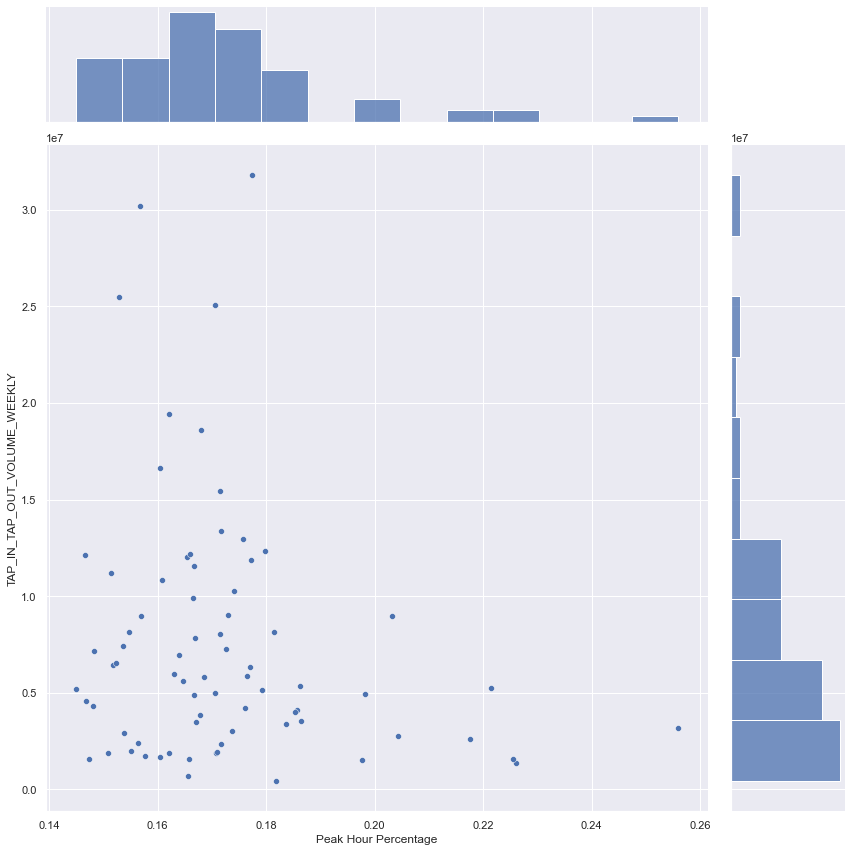

In [4]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Peak Hour Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [5]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Peak Hour Percentage'])

-0.19676284154571055

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Peak Hour Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [7]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [18855207.64822694]
Coefficients 	: a =  [[-64489974.34690724]]


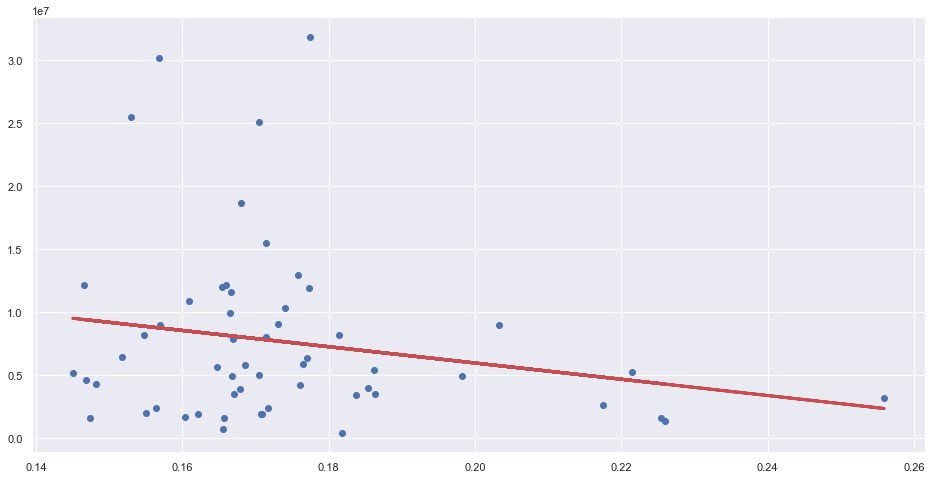

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [10]:
# Explained Variance in simply the "Score"
ev1 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev1)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)

Explained Variance (R^2) 	: 0.03952509305032559
Mean Squared Error (MSE) 	: 46750383619575.13


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Peak Hour Percentage` in the Test dataset.

In [11]:
y_test_pred = linreg.predict(X_test)

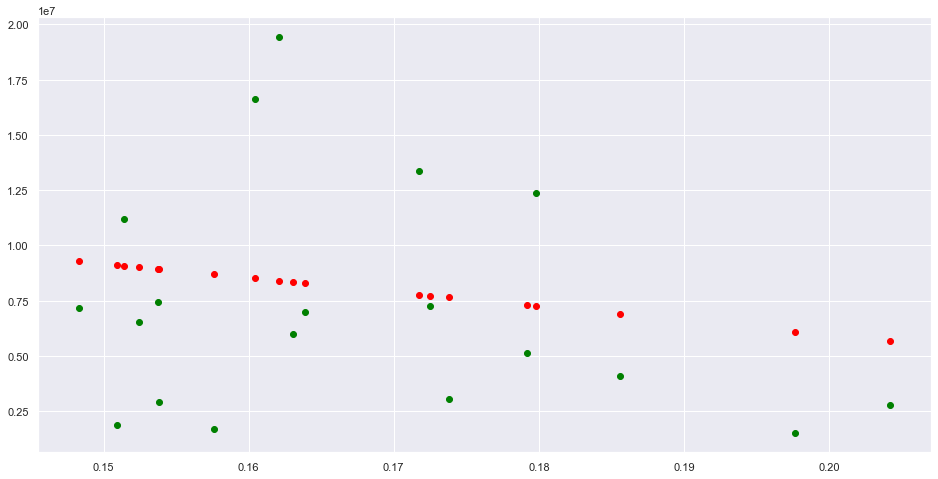

In [12]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [13]:
# Explained Variance in simply the "Score"
evTest1 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest1)
mseTest1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest1)

Explained Variance (R^2) 	: 0.022258595107632284
Mean Squared Error (MSE) 	: 24733869898589.42


### Variable 2: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Weekday Percentage

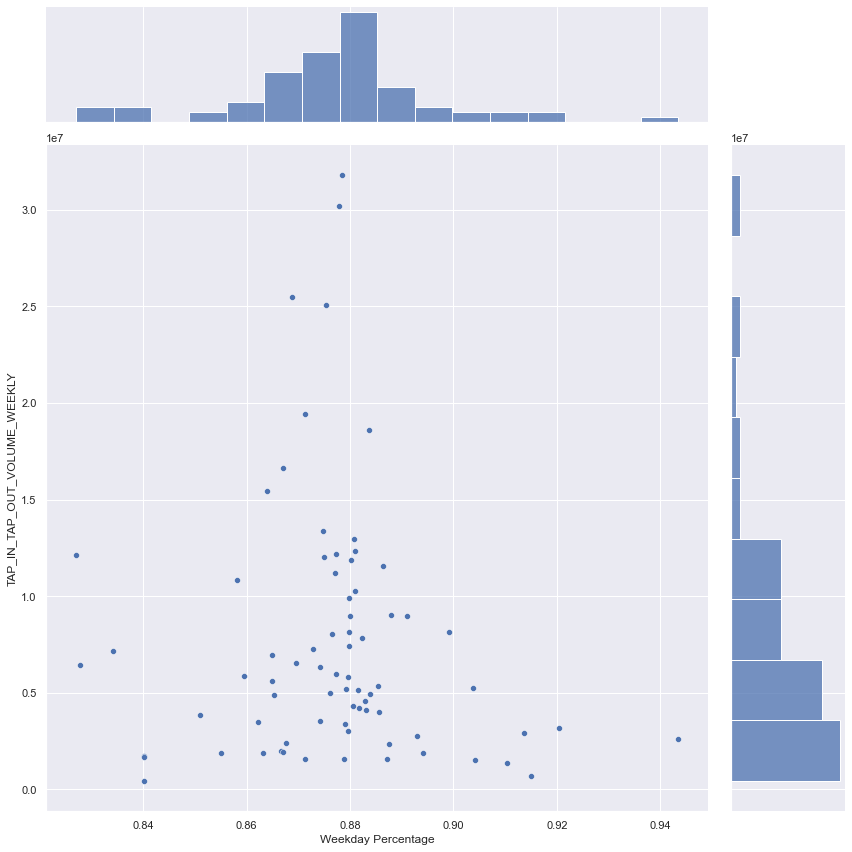

In [14]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Weekday Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [15]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Weekday Percentage'])

-0.09195934445785911

In [16]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Weekday Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [18]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [30179202.9861109]
Coefficients 	: a =  [[-25730376.49107977]]


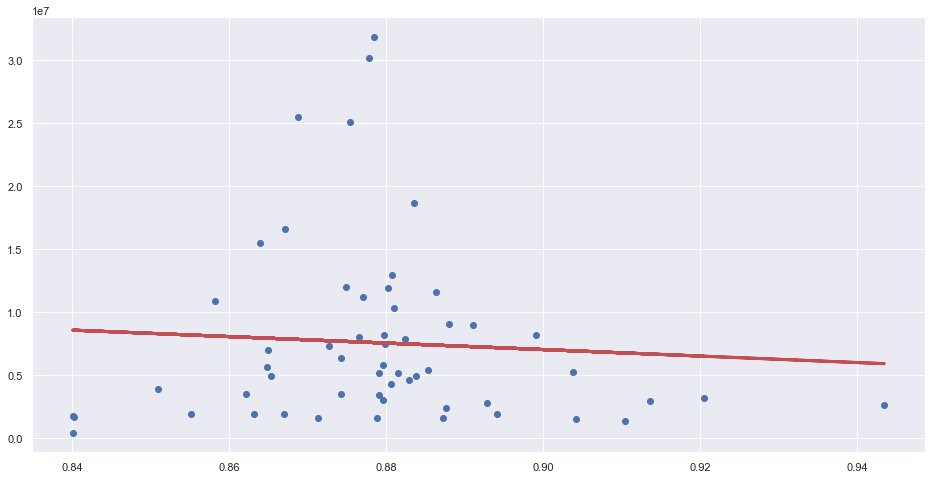

In [19]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [20]:
# Explained Variance in simply the "Score"
ev2 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev2)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse2 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse2)

Explained Variance (R^2) 	: 0.004463757416513392
Mean Squared Error (MSE) 	: 49893661250857.94


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Weekday Percentage` in the Test dataset.

In [21]:
y_test_pred = linreg.predict(X_test)

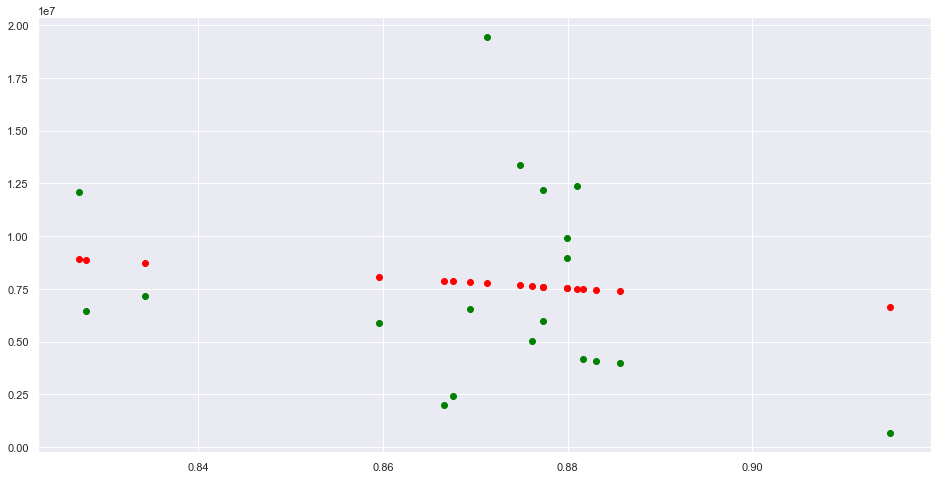

In [22]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [23]:
# Explained Variance in simply the "Score"
evTest2 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest2)
mseTest2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest2)

Explained Variance (R^2) 	: 0.03330089788754853
Mean Squared Error (MSE) 	: 20468718666951.805


### Variable 3: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Male Percentage

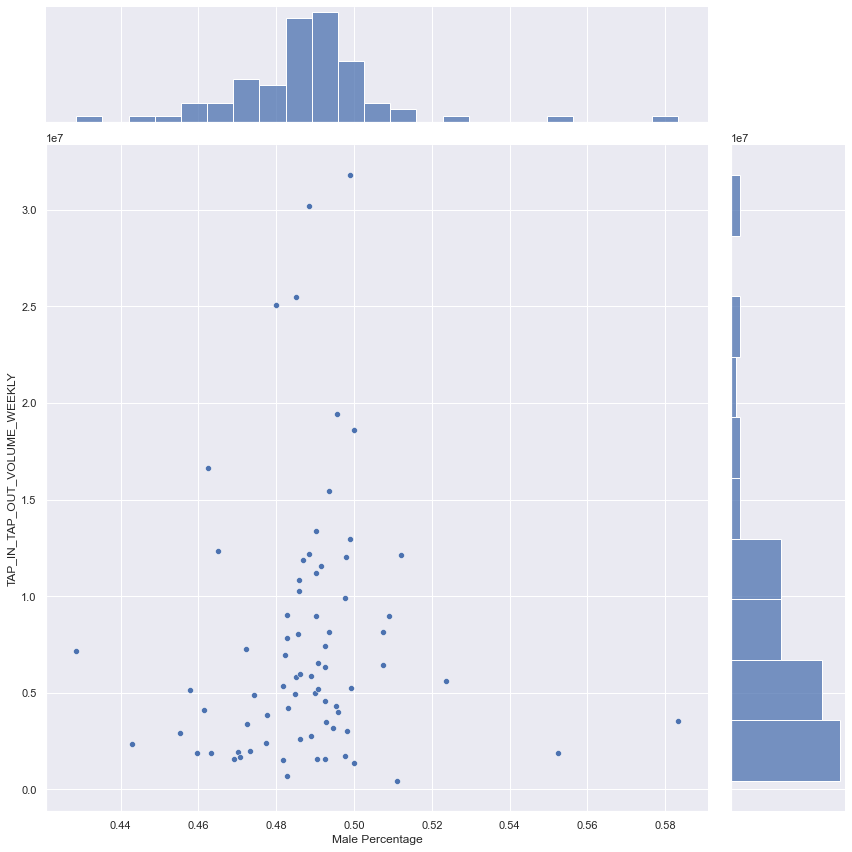

In [24]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Male Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [25]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Male Percentage'])

0.051510179379100664

In [26]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Male Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [27]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [28]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-3930215.90032146]
Coefficients 	: a =  [[24174285.20305998]]


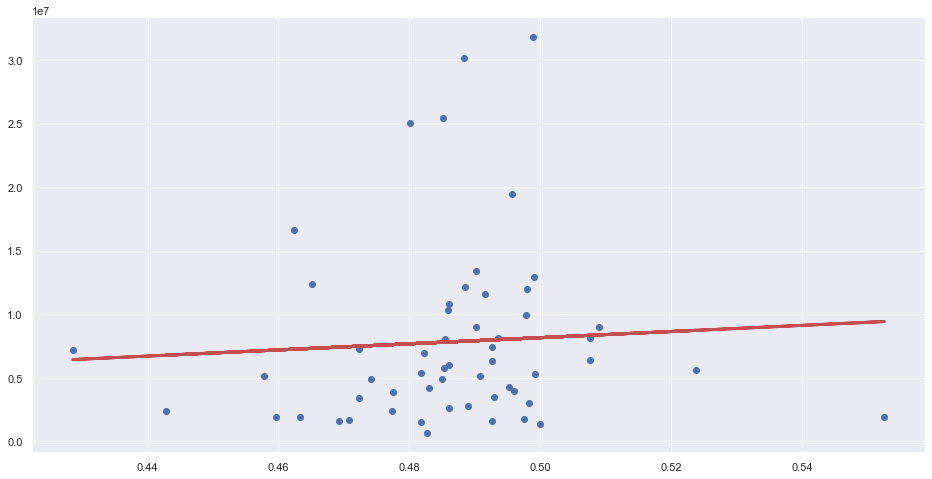

In [29]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [30]:
# Explained Variance in simply the "Score"
ev3 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev3)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse3 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse3)

Explained Variance (R^2) 	: 0.003992377079003795
Mean Squared Error (MSE) 	: 48513371662169.63


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Male Percentage` in the Test dataset.

In [31]:
y_test_pred = linreg.predict(X_test)

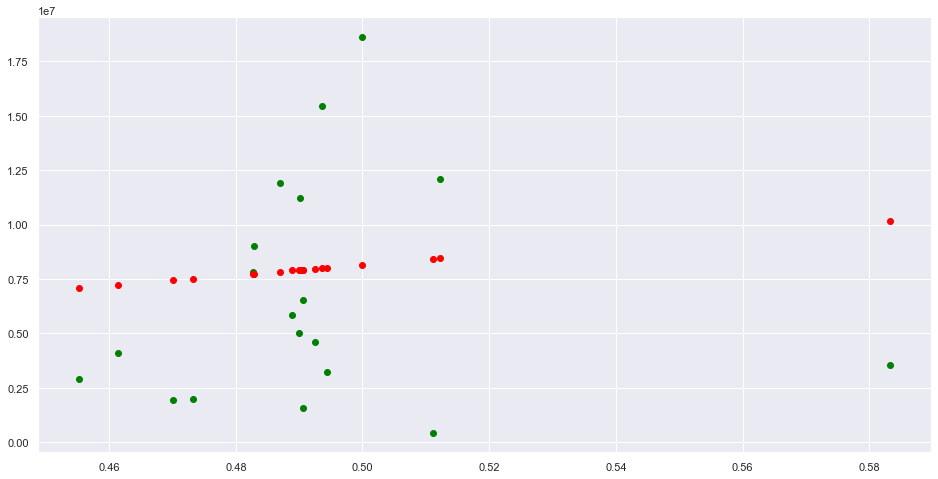

In [32]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [33]:
# Explained Variance in simply the "Score"
evTest3 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest3)
mseTest3 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest3)

Explained Variance (R^2) 	: -0.06228891500631617
Mean Squared Error (MSE) 	: 25945290159275.39


### Variable 4: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 00 - 19

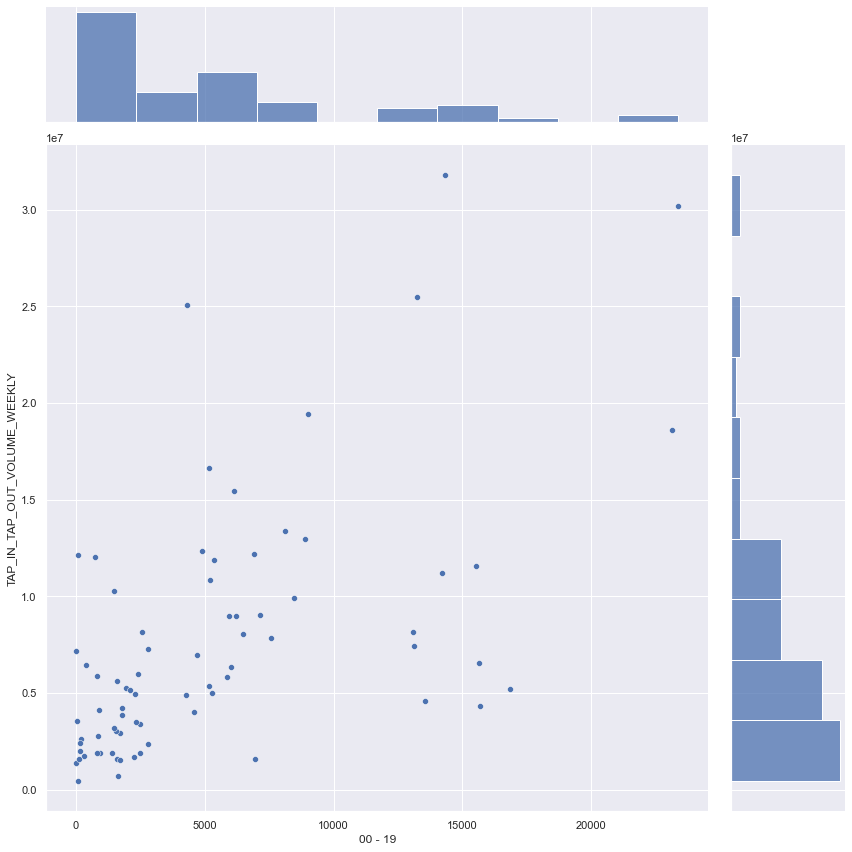

In [34]:
sb.jointplot(data = BusMRTGeoData_reg, x = '00 - 19', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [35]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['00 - 19'])

0.5898459605340309

In [36]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['00 - 19'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [37]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [38]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3729660.22860026]
Coefficients 	: a =  [[689.09219381]]


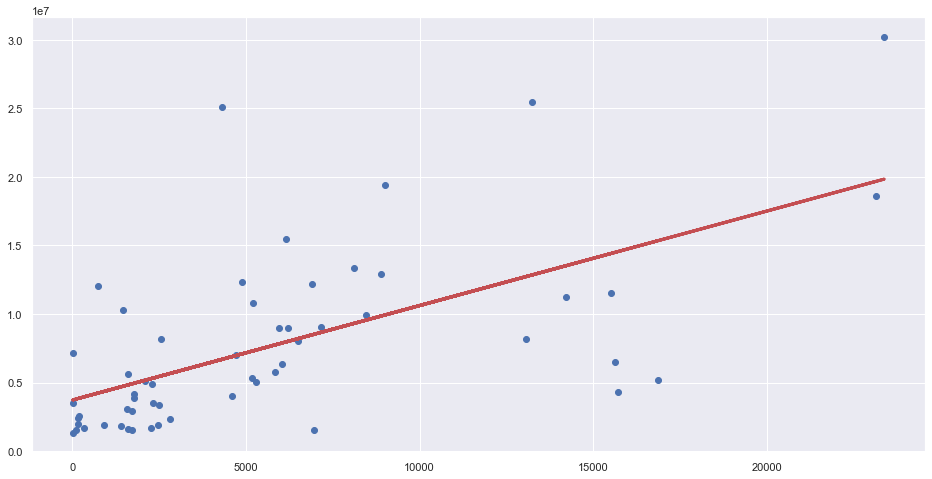

In [39]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [40]:
# Explained Variance in simply the "Score"
ev4 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev4)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse4 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse4)

Explained Variance (R^2) 	: 0.3730182497724843
Mean Squared Error (MSE) 	: 25618864351166.043


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `00 - 19` in the Test dataset.

In [41]:
y_test_pred = linreg.predict(X_test)

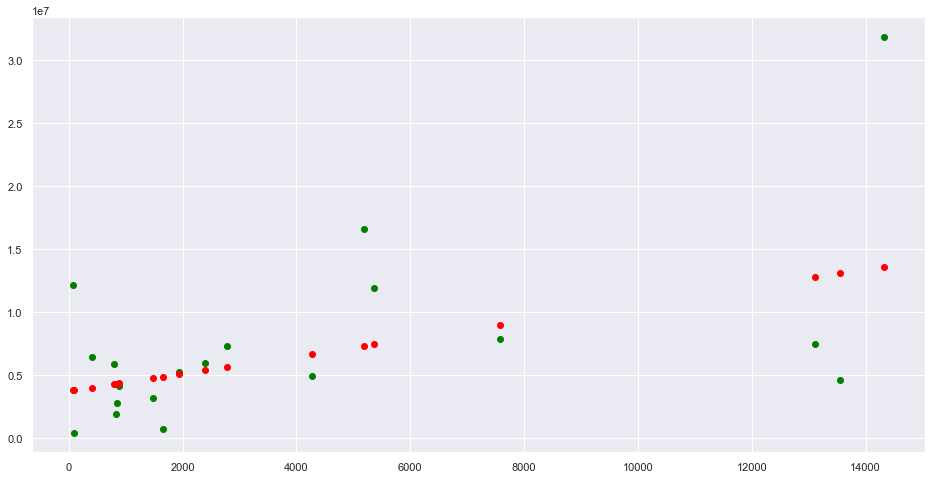

In [42]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [43]:
# Explained Variance in simply the "Score"
evTest4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest4)
mseTest4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest4)

Explained Variance (R^2) 	: 0.2803456452689985
Mean Squared Error (MSE) 	: 34859523175069.723


### Variable 5: Predicting AP_IN_TAP_OUT_VOLUME_WEEKLY using 20 - 39

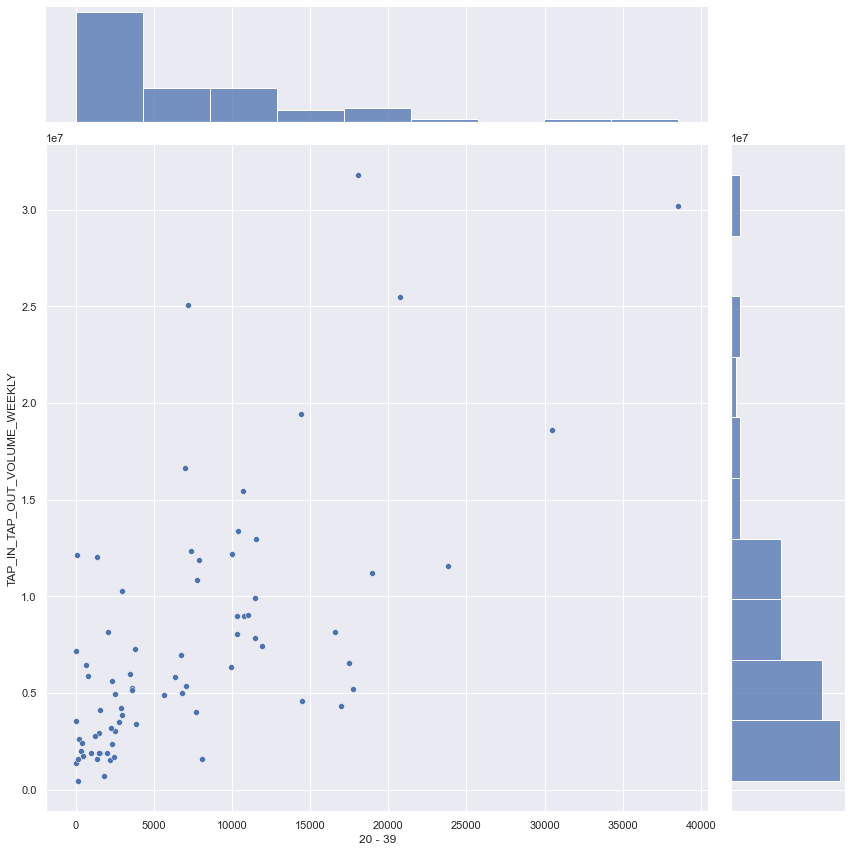

In [44]:
sb.jointplot(data = BusMRTGeoData_reg, x = '20 - 39', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [45]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['20 - 39'])

0.6761895002861

In [46]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['20 - 39'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [47]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [48]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3168053.32695786]
Coefficients 	: a =  [[663.66092961]]


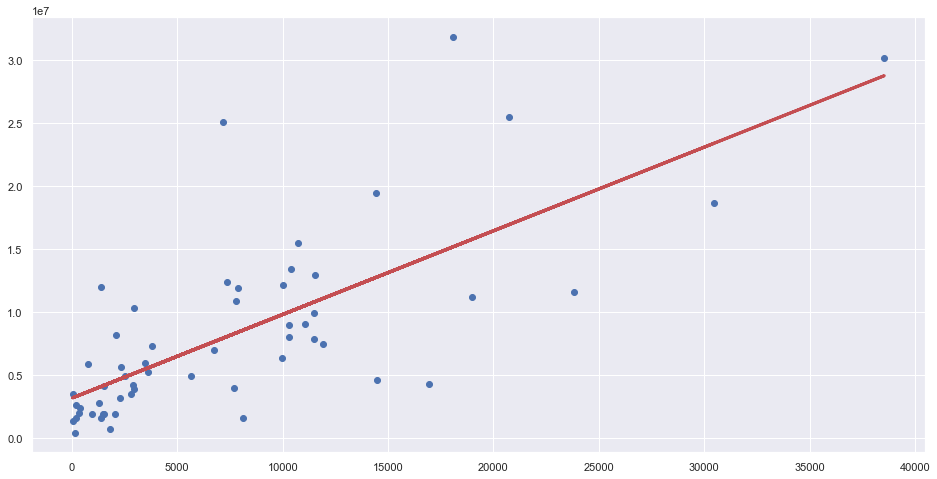

In [49]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [50]:
# Explained Variance in simply the "Score"
ev5 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev5)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse5 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse5)

Explained Variance (R^2) 	: 0.5347016674754412
Mean Squared Error (MSE) 	: 23795117152280.395


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `20 - 39` in the Test dataset.

In [51]:
y_test_pred = linreg.predict(X_test)

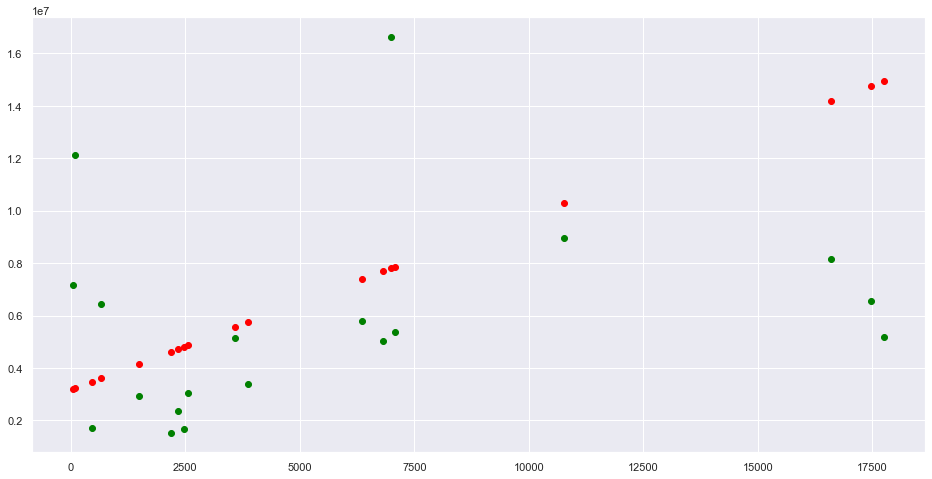

In [52]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [53]:
# Explained Variance in simply the "Score"
evTest5 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest5)
mseTest5 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest5)

Explained Variance (R^2) 	: -0.6636606088363184
Mean Squared Error (MSE) 	: 22949007025684.906


### Variable 6: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 40 - 59

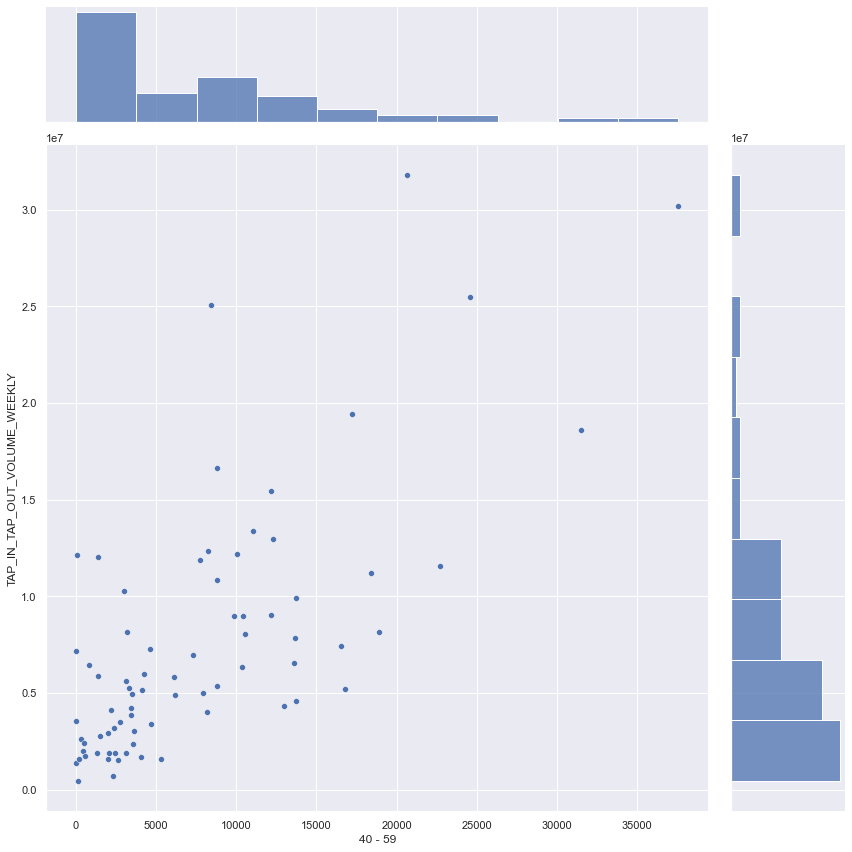

In [54]:
sb.jointplot(data = BusMRTGeoData_reg, x = '40 - 59', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [55]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['40 - 59'])

0.7205219507247155

In [56]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['40 - 59'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [57]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [58]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2616164.40752021]
Coefficients 	: a =  [[647.56733914]]


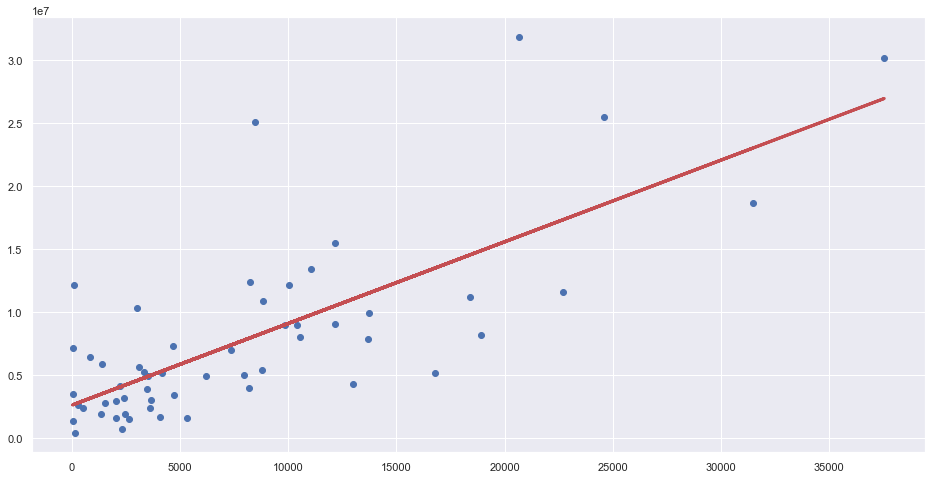

In [59]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [60]:
# Explained Variance in simply the "Score"
ev6 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev6)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse6 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse6)

Explained Variance (R^2) 	: 0.5560538337161167
Mean Squared Error (MSE) 	: 21456426824027.438


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `40 - 59` in the Test dataset.

In [61]:
y_test_pred = linreg.predict(X_test)

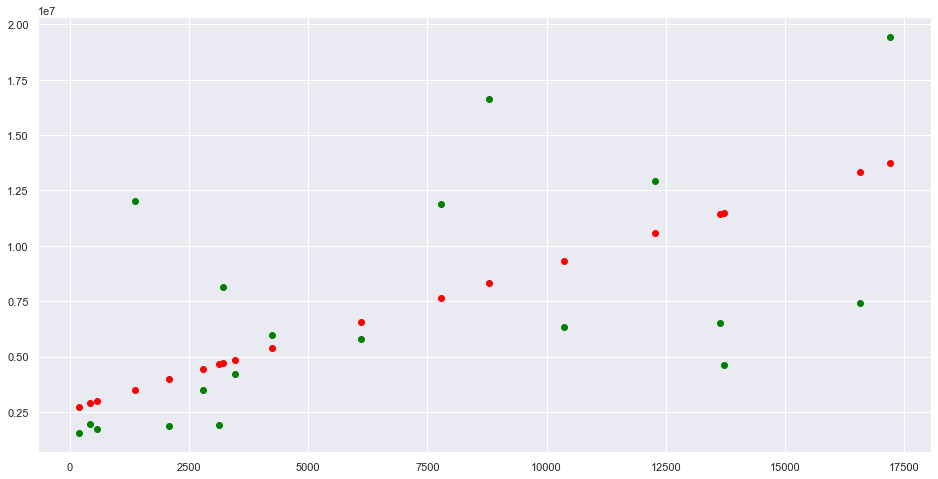

In [62]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [63]:
# Explained Variance in simply the "Score"
evTest6 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest6)
mseTest6 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest6)

Explained Variance (R^2) 	: 0.3100530370163809
Mean Squared Error (MSE) 	: 18035883478374.207


### Variable 7: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 60 & Over

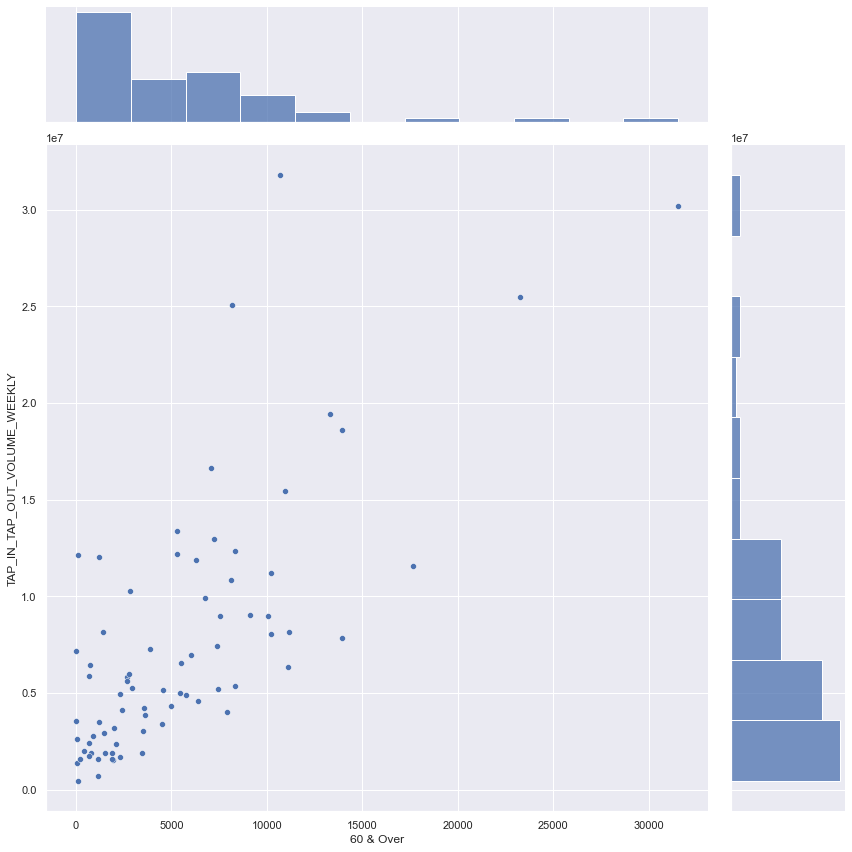

In [64]:
sb.jointplot(data = BusMRTGeoData_reg, x = '60 & Over', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [65]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['60 & Over'])

0.7365747767522861

In [66]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['60 & Over'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [67]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [68]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3006608.88240225]
Coefficients 	: a =  [[811.12990688]]


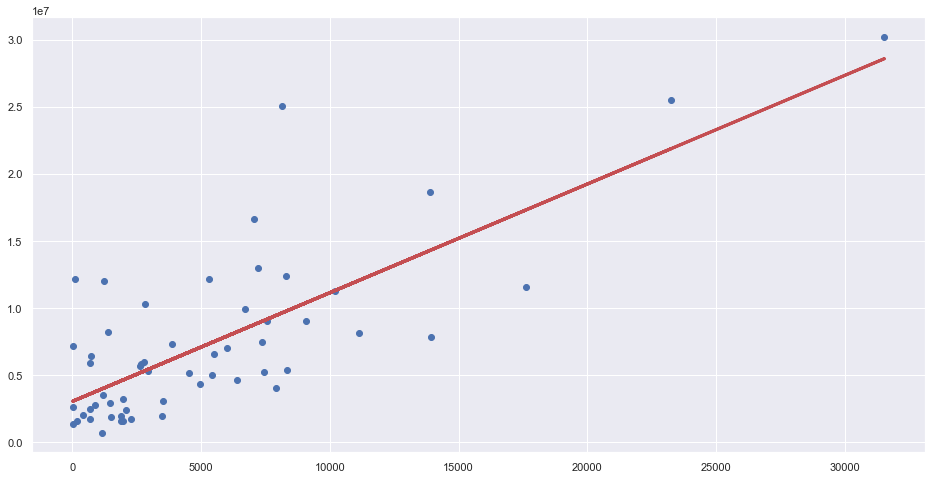

In [69]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [70]:
# Explained Variance in simply the "Score"
ev7 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev7)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse7 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse7)

Explained Variance (R^2) 	: 0.5851076181668333
Mean Squared Error (MSE) 	: 15882155427769.941


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `60 & Over` in the Test dataset.

In [71]:
y_test_pred = linreg.predict(X_test)

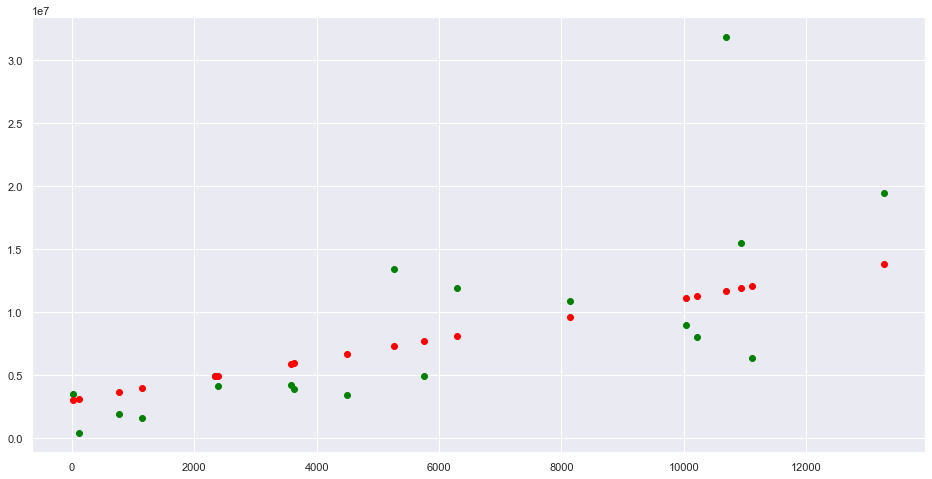

In [72]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [73]:
# Explained Variance in simply the "Score"
evTest7 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest7)
mseTest7 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest7)

Explained Variance (R^2) 	: 0.43524950954845754
Mean Squared Error (MSE) 	: 31155088603137.094


### Variable 8: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Average Income

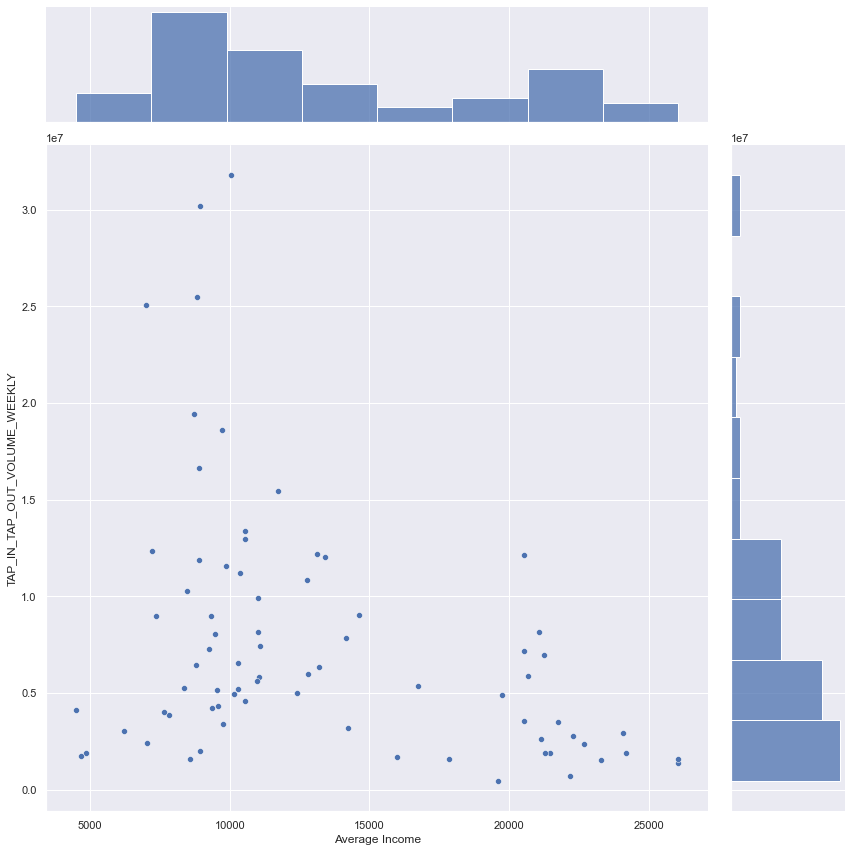

In [74]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Average Income', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [75]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Average Income'])

-0.36164758671147695

In [76]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Average Income'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (56, 1) (56, 1)
Test Set  : (19, 1) (19, 1)


In [77]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [78]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [12444122.41423186]
Coefficients 	: a =  [[-394.8082627]]


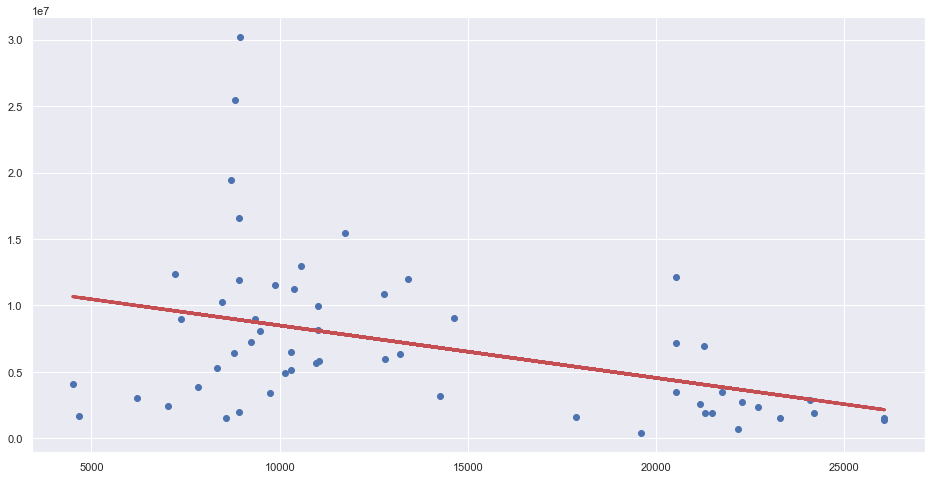

In [79]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [80]:
# Explained Variance in simply the "Score"
ev8 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev8)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse8 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse8)

Explained Variance (R^2) 	: 0.16794217907137554
Mean Squared Error (MSE) 	: 29502236063867.285


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Average Income` in the Test dataset.

In [81]:
y_test_pred = linreg.predict(X_test)

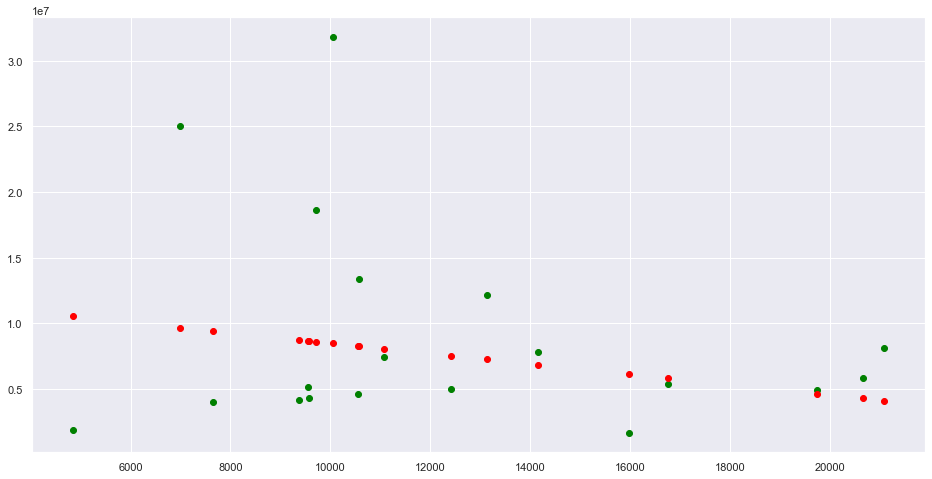

In [82]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [83]:
# Explained Variance in simply the "Score"
evTest8 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest8)
mseTest8 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest8)

Explained Variance (R^2) 	: 0.017809577869889903
Mean Squared Error (MSE) 	: 60385570099156.98


### Comparing the Uni-Variate Linear Models

In [84]:
variables = ['Peak Hour Percentage', 'Weekday Percentage', 'Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
ev = [ev1, ev2, ev3, ev4, ev5, ev6, ev7, ev8]
mse = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]
evTest = [evTest1, evTest2, evTest3, evTest4, evTest5, evTest6, evTest7, evTest8]
mseTest = [mseTest1, mseTest2, mseTest3, mseTest4, mseTest5, mseTest6, mseTest7, mseTest8]

for i in range(8):
    print(variables[i], ": Explained variance(train):", ev[i], "Mean Squared Error(train):", mse[i], "\nExplained variance(test):", evTest[i], "Mean Squared Error(test):", mseTest[i])
    print("\n")

Peak Hour Percentage : Explained variance(train): 0.03952509305032559 Mean Squared Error(train): 46750383619575.13 
Explained variance(test): 0.022258595107632284 Mean Squared Error(test): 24733869898589.42


Weekday Percentage : Explained variance(train): 0.004463757416513392 Mean Squared Error(train): 49893661250857.94 
Explained variance(test): 0.03330089788754853 Mean Squared Error(test): 20468718666951.805


Male Percentage : Explained variance(train): 0.003992377079003795 Mean Squared Error(train): 48513371662169.63 
Explained variance(test): -0.06228891500631617 Mean Squared Error(test): 25945290159275.39


00 - 19 : Explained variance(train): 0.3730182497724843 Mean Squared Error(train): 25618864351166.043 
Explained variance(test): 0.2803456452689985 Mean Squared Error(test): 34859523175069.723


20 - 39 : Explained variance(train): 0.5347016674754412 Mean Squared Error(train): 23795117152280.395 
Explained variance(test): -0.6636606088363184 Mean Squared Error(test): 22949007

* `TAP_IN_TAP_OUT_VOLUME_WEEKLY` vs `60 & Over` has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* 6 variables to be used in the regression models would be `Peak Hour Percentage`, `00 - 19`, `20 - 39`, `40 - 59`, `60 & Over`, `Average Income`
   


## Multivariate Models

### Multivariate Linear Regression

In [85]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (56, 6) (56, 1)
Test Set  : (19, 6) (19, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

In [86]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [11925558.78754821]
Coefficients 	: a =  [[-4.30624941e+07 -2.52927321e+03  1.43545007e+03  1.24994715e+03
  -3.91393626e+02 -7.77802680e+01]]


#### Prediction of Response based on the Predictor

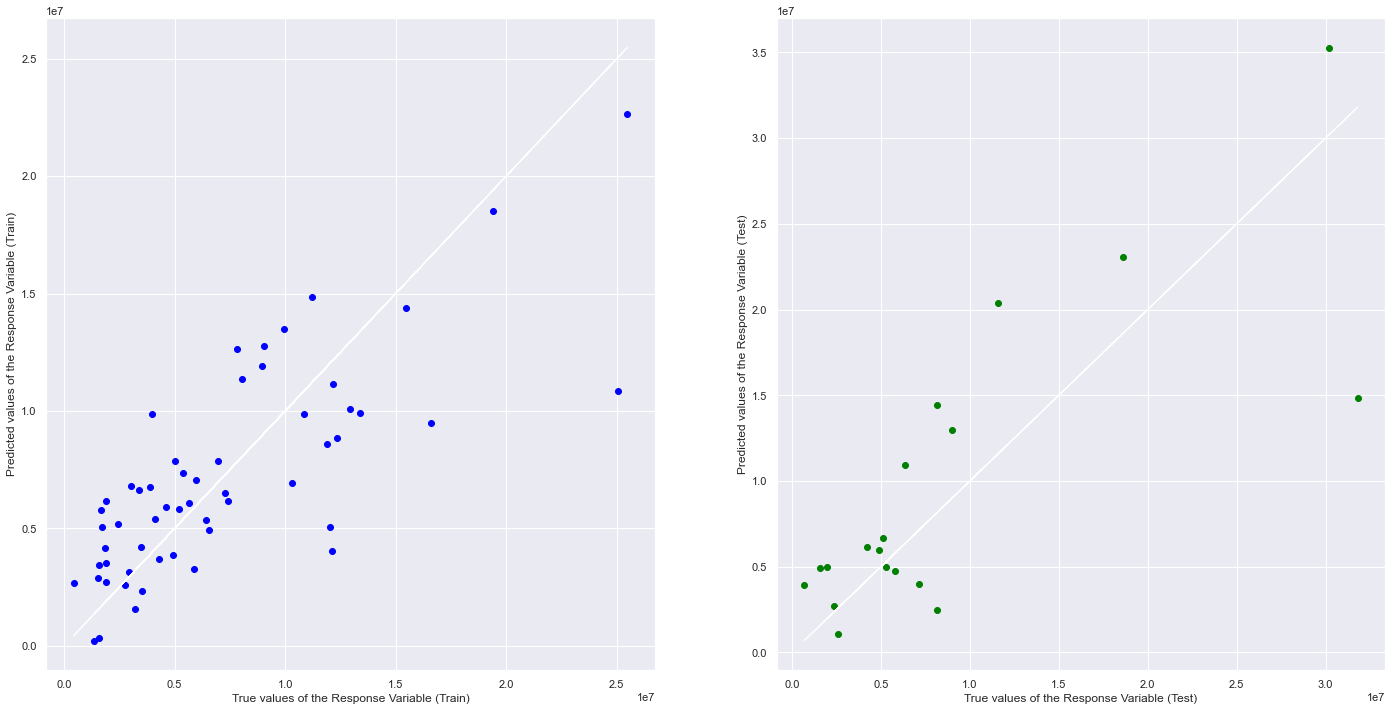

In [87]:
# Predict values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [88]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6048742600249376
Mean Squared Error (MSE) on Train Set 	: 12410876609877.123
Explained Variance (R^2) on Test Set 	: 0.5962553516366877
Mean Squared Error (MSE) on Test Set 	: 30088810725714.96


### Decision Tree Regression

In [89]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

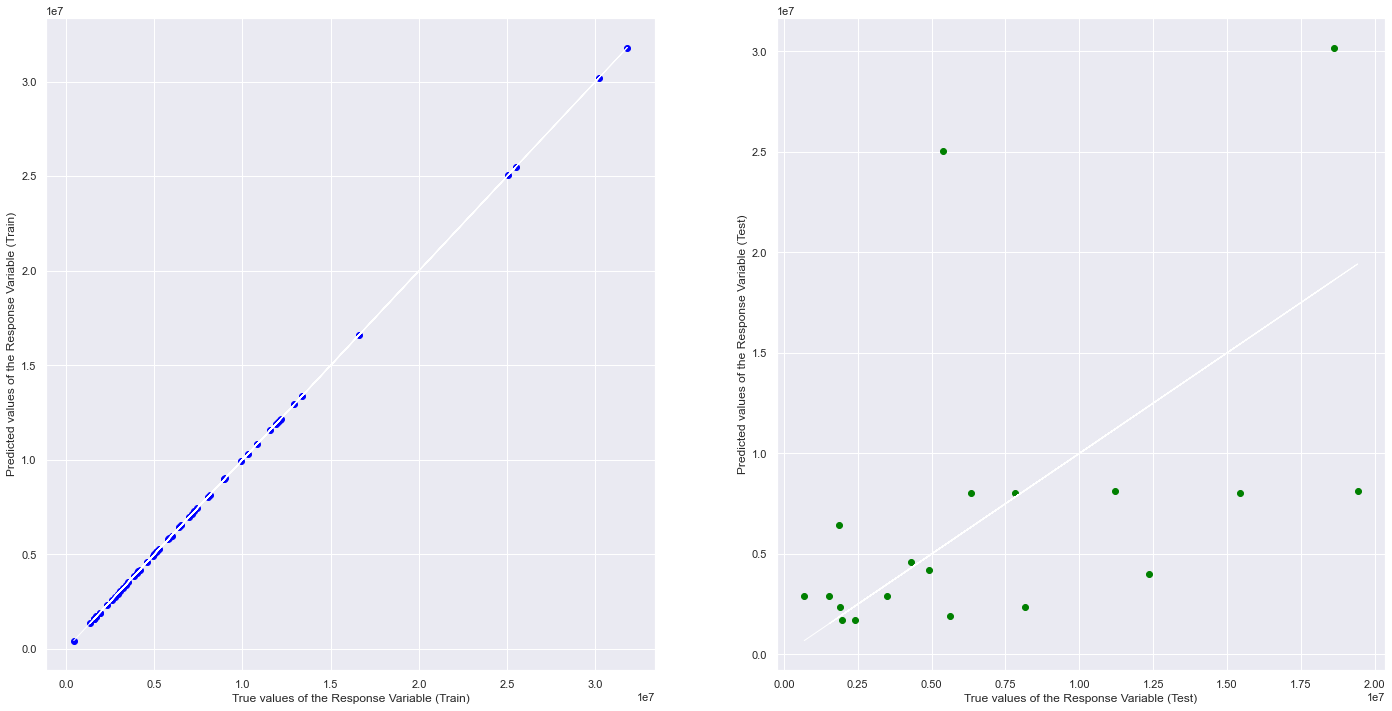

In [90]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Decision Tree Regression Model

In [91]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 1.0
Mean Squared Error (MSE) on Train Set 	: 0.0
Explained Variance (R^2) on Test Set 	: -0.42332492597037286
Mean Squared Error (MSE) on Test Set 	: 45422439922026.84


### Random Forest Regression

In [92]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

<ipython-input-92-616e5b1aed25>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regress.fit(X_train, y_train)


RandomForestRegressor()

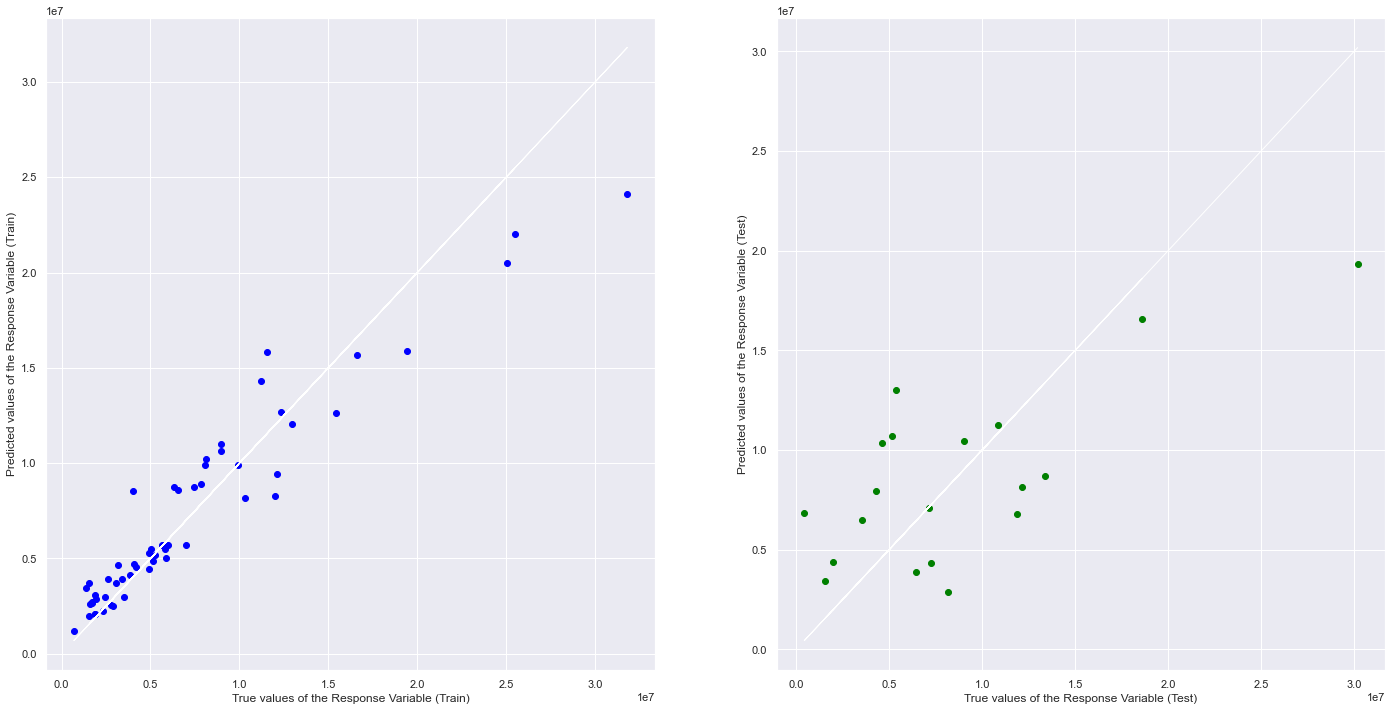

In [93]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Random Forest Regression Model

In [94]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8962667668721898
Mean Squared Error (MSE) on Train Set 	: 4289300728158.738
Explained Variance (R^2) on Test Set 	: 0.510393231617696
Mean Squared Error (MSE) on Test Set 	: 22388929194330.332


* Random Forest Regression Model has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* Therefore Random Forest Regression will be used to predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` in 2025
   


## Feed 2025 Predictions Into Random Forest Regression Model

#### Feed demographic predictions in 2025 into the regression model, then find 20 subzones with the most tap ins and tap out (most traffic/demand for public transportation), hence these subzones will be most in need of MRT/Bus Stops

In [95]:
dT_predicted_subzone_data = pd.read_csv('dT_predicted_subzone_data.csv')
dT_predicted_subzone_data

,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,SUBZONE_N
0,0.492461,5122.252793,10458.081465,11223.163288,12593.503017,13975.923484,ALJUNIED
1,0.470599,4067.156260,5603.213452,5317.299340,7042.132011,19689.614782,ANAK BUKIT
2,0.491532,17236.756103,14465.103663,19500.791783,11801.692781,10323.206492,ANCHORVALE
3,0.480100,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609,BEDOK NORTH
4,0.496267,4860.626994,7077.883636,7833.619187,6448.624985,12714.717735,BEDOK RESERVOIR
...,...,...,...,...,...,...,...
70,0.494843,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491,WATERWAY EAST
71,0.497475,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327,WOODLANDS EAST
72,0.503989,6106.183179,9709.618690,9311.253662,10994.809353,7373.988048,WOODLANDS WEST
73,0.497592,4707.983975,10597.570993,11633.502435,10049.571598,11200.734758,YEW TEE


In [96]:
peak_Hour_Percentage = BusMRTGeoData_reg.filter(['SUBZONE_N', 'Peak Hour Percentage'])
peak_Hour_Percentage

,SUBZONE_N,Peak Hour Percentage
0,ALJUNIED,0.171459
1,ANAK BUKIT,0.166717
2,ANCHORVALE,0.146781
3,BEDOK NORTH,0.152963
4,BEDOK RESERVOIR,0.170511
...,...,...
80,WATERWAY EAST,0.148130
81,WOODLANDS EAST,0.167987
82,WOODLANDS WEST,0.156989
83,YEW TEE,0.166572


In [97]:
dT_predicted_subzone_data = dT_predicted_subzone_data.filter(['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over','SUBZONE_N', 'Average Income'])
dT_predicted_subzone_data = pd.merge(peak_Hour_Percentage, dT_predicted_subzone_data, how='inner', on='SUBZONE_N') 
dT_predicted_subzone_data

,SUBZONE_N,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,0.171459,5122.252793,10458.081465,11223.163288,12593.503017,13975.923484
1,ANAK BUKIT,0.166717,4067.156260,5603.213452,5317.299340,7042.132011,19689.614782
2,ANCHORVALE,0.146781,17236.756103,14465.103663,19500.791783,11801.692781,10323.206492
3,BEDOK NORTH,0.152963,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609
4,BEDOK RESERVOIR,0.170511,4860.626994,7077.883636,7833.619187,6448.624985,12714.717735
...,...,...,...,...,...,...,...
69,WATERWAY EAST,0.148130,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491
70,WOODLANDS EAST,0.167987,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327
71,WOODLANDS WEST,0.156989,6106.183179,9709.618690,9311.253662,10994.809353,7373.988048
72,YEW TEE,0.166572,4707.983975,10597.570993,11633.502435,10049.571598,11200.734758


In [98]:
pd.DataFrame(dT_predicted_subzone_data[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']])

,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,0.171459,5122.252793,10458.081465,11223.163288,12593.503017,13975.923484
1,0.166717,4067.156260,5603.213452,5317.299340,7042.132011,19689.614782
2,0.146781,17236.756103,14465.103663,19500.791783,11801.692781,10323.206492
3,0.152963,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609
4,0.170511,4860.626994,7077.883636,7833.619187,6448.624985,12714.717735
...,...,...,...,...,...,...
69,0.148130,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491
70,0.167987,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327
71,0.156989,6106.183179,9709.618690,9311.253662,10994.809353,7373.988048
72,0.166572,4707.983975,10597.570993,11633.502435,10049.571598,11200.734758


In [99]:
pred_2025 = pd.DataFrame(regress.predict(pd.DataFrame(dT_predicted_subzone_data[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']])))
dT_predicted_subzone_data.insert(1, 'TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025', pred_2025, True)
dT_predicted_subzone_data

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,10244974.97,0.171459,5122.252793,10458.081465,11223.163288,12593.503017,13975.923484
1,ANAK BUKIT,8615785.85,0.166717,4067.156260,5603.213452,5317.299340,7042.132011,19689.614782
2,ANCHORVALE,11930556.99,0.146781,17236.756103,14465.103663,19500.791783,11801.692781,10323.206492
3,BEDOK NORTH,21685179.14,0.152963,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609
4,BEDOK RESERVOIR,7491683.88,0.170511,4860.626994,7077.883636,7833.619187,6448.624985,12714.717735
...,...,...,...,...,...,...,...,...
69,WATERWAY EAST,17363734.17,0.148130,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491
70,WOODLANDS EAST,16528049.31,0.167987,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327
71,WOODLANDS WEST,13783202.73,0.156989,6106.183179,9709.618690,9311.253662,10994.809353,7373.988048
72,YEW TEE,11216833.31,0.166572,4707.983975,10597.570993,11633.502435,10049.571598,11200.734758


In [100]:
dT_predicted_subzone_data = dT_predicted_subzone_data.sort_values(by=['TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025'],ascending=False)
dT_predicted_subzone_data

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
3,BEDOK NORTH,21685179.14,0.152963,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609
28,JURONG WEST CENTRAL,20487398.04,0.177487,8753.205425,13430.176428,21294.620525,13943.247113,10063.266144
60,TAMPINES EAST,19316500.45,0.156774,18670.117650,26002.917486,31163.876237,40363.341314,8937.417560
39,MATILDA,18858086.74,0.152429,18149.352411,18905.659524,28547.467977,8197.378796,10331.212938
21,FERNVALE,17821740.00,0.144997,21789.944591,19692.454212,40199.396285,11981.567527,12016.899186
...,...,...,...,...,...,...,...,...
19,FARRER COURT,2891214.32,0.165724,1998.989338,1499.153655,3017.702082,1216.191247,19006.187607
46,PASIR PANJANG 1,2531846.34,0.204234,842.227443,1240.101978,1675.250848,1119.347189,21880.882791
16,CORONATION ROAD,2272245.64,0.153811,2002.261986,1426.128645,2160.546077,1659.243202,24029.751831
35,LEEDON PARK,2251626.39,0.150938,1381.008554,1428.296965,2153.197273,1613.289596,24092.406267


<AxesSubplot:xlabel='TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025', ylabel='SUBZONE_N'>

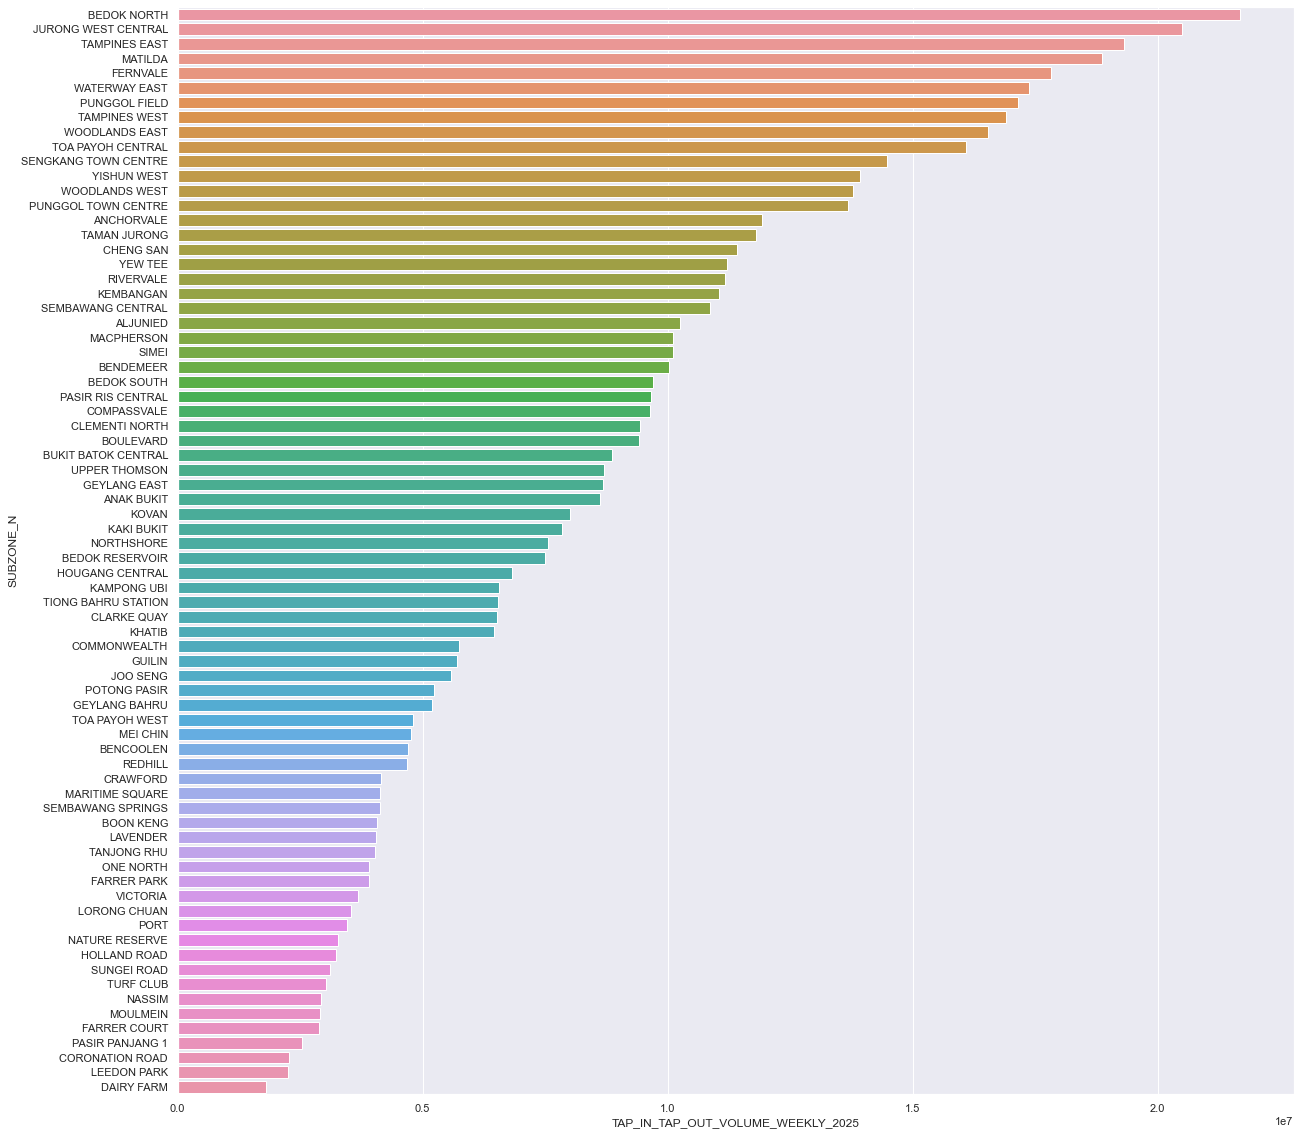

In [101]:
fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025", y="SUBZONE_N", data=dT_predicted_subzone_data)

In [102]:
dT_predicted_subzone_data_top20 = dT_predicted_subzone_data.head(20)
dT_predicted_subzone_data_top20

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
3,BEDOK NORTH,21685179.14,0.152963,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609
28,JURONG WEST CENTRAL,20487398.04,0.177487,8753.205425,13430.176428,21294.620525,13943.247113,10063.266144
60,TAMPINES EAST,19316500.45,0.156774,18670.117650,26002.917486,31163.876237,40363.341314,8937.417560
39,MATILDA,18858086.74,0.152429,18149.352411,18905.659524,28547.467977,8197.378796,10331.212938
21,FERNVALE,17821740.00,0.144997,21789.944591,19692.454212,40199.396285,11981.567527,12016.899186
69,WATERWAY EAST,17363734.17,0.148130,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491
50,PUNGGOL FIELD,17155454.18,0.153721,13138.094320,11882.928124,21044.738536,10669.777821,11477.691768
61,TAMPINES WEST,16898904.25,0.166681,15265.233780,23922.926214,20913.442726,23779.495070,10328.011754
70,WOODLANDS EAST,16528049.31,0.167987,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327
64,TOA PAYOH CENTRAL,16089550.99,0.160418,4363.950488,7007.494396,8640.696104,7527.213637,9055.311414


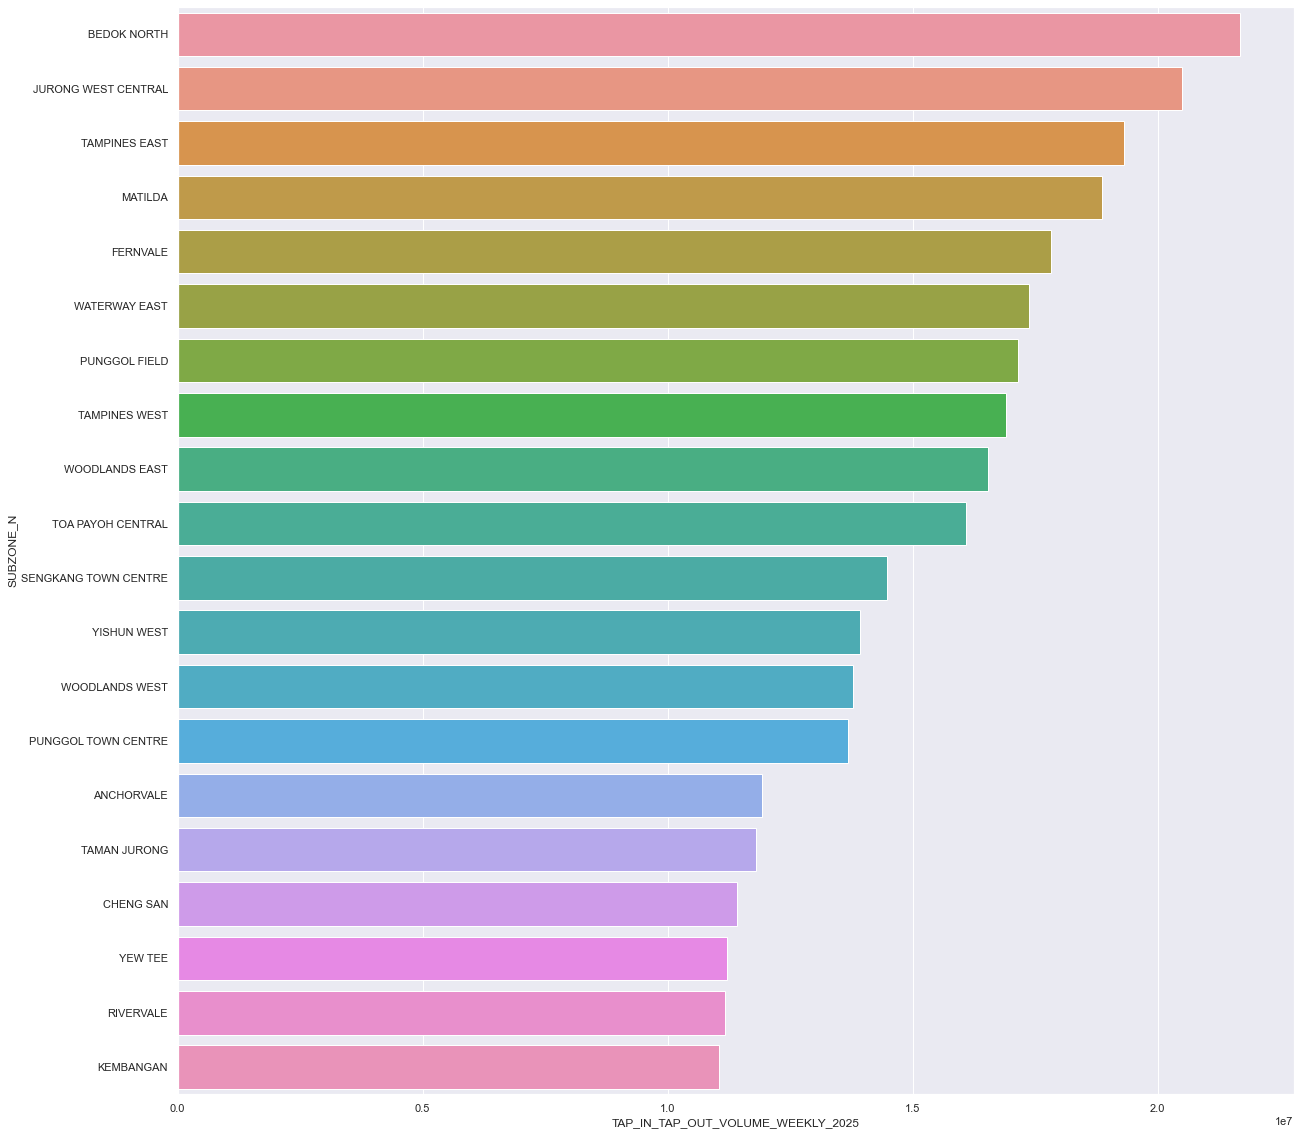

In [103]:
fig, ax = plt.subplots(figsize=(20, 20))
graph = sb.barplot(ax=ax, x="TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025", y="SUBZONE_N", data=dT_predicted_subzone_data_top20)

In [104]:
listOfTop20Subzones = []
for i in range(20):
    listOfTop20Subzones.append(dT_predicted_subzone_data.iloc[i]['SUBZONE_N'])
listOfTop20Subzones

['BEDOK NORTH',
 'JURONG WEST CENTRAL',
 'TAMPINES EAST',
 'MATILDA',
 'FERNVALE',
 'WATERWAY EAST',
 'PUNGGOL FIELD',
 'TAMPINES WEST',
 'WOODLANDS EAST',
 'TOA PAYOH CENTRAL',
 'SENGKANG TOWN CENTRE',
 'YISHUN WEST',
 'WOODLANDS WEST',
 'PUNGGOL TOWN CENTRE',
 'ANCHORVALE',
 'TAMAN JURONG',
 'CHENG SAN',
 'YEW TEE',
 'RIVERVALE',
 'KEMBANGAN']